In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import time

In [2]:
os.chdir('C:\\Users\\Nikola\\Desktop\\Nata Fax\\Course - PDS - 2017\\Project 8 - Pollen Allergy Data Analysis')
att_names = ['ID','Date','Location','Country','Region','Overall Symptoms','Eye Symptoms', 'Eye Itching','Eye Foreign Body','Eye Redness','Eye Watering','Eye Total 1','Eye Total 2','Nose Symptoms', 'Nose Itching','Nose Sneezing','Nose Running','Nose Blocked','Nose Total 1','Nose Total 2','Lungs Symptoms','Lungs Wheezing','Lungs Shortness of Breath','Lungs Cough','Lungs Asthma','Lungs Total 1','Lungs Total 2','Medicine Eye Drops','Medicine Nose Drops','Medicine Tablets','Medicine Homoepathic','Medicine Other','Medicine None','Overall Symptoms Total','Comments']
data = pd.read_csv('PHD-2009-2017.csv' , delimiter = ';', names=att_names, usecols= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], skiprows = [0], na_values = 'NaN')
data.head()

,ID,Date,Location,Country,Region,Overall Symptoms,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,...,Lungs Total 1,Lungs Total 2,Medicine Eye Drops,Medicine Nose Drops,Medicine Tablets,Medicine Homoepathic,Medicine Other,Medicine None,Overall Symptoms Total,Comments
0,165177,27.03.2017,NaN,RS,yuvojvod,9,2,0,0,0,...,0,0,1,1,0,0,0,0,11,NaN
1,7402,28.04.2010,NaN,RS,yuvojvod,7,1,1,0,0,...,3,3,0,0,0,1,0,0,7,suvost preterana po neki put
2,24402,21.06.2012,NaN,RS,yuvojvod,7,1,1,0,0,...,0,0,0,1,0,0,0,0,6,NaN
3,7892,14.05.2010,NaN,RS,yuvojvod,9,1,1,0,0,...,0,0,0,1,0,0,1,0,11,NaN
4,7892,15.05.2010,NaN,RS,yuvojvod,9,2,1,0,0,...,0,0,0,1,0,0,1,0,13,NaN


In [3]:
data.shape

(33136, 35)

# Task 1

In [4]:
data_entries = data['ID'].value_counts()
data_entries

16796     2259
10021     1515
37561     1308
17507     1303
9862      1197
20686     1120
25782      972
89069      736
21089      734
2747       717
17345      612
17119      583
7616       564
9530       492
40394      424
16108      408
26642      379
40424      373
20458      371
9516       356
39575      349
97094      294
25681      294
19934      280
21972      266
40062      260
3709       251
2729       239
25867      230
57861      222
          ... 
9046         1
17434        1
3571         1
40609        1
171713       1
9300         1
129935       1
80727        1
2670         1
11339        1
9770         1
7725         1
10090        1
188405       1
4205         1
24803        1
2510         1
2638         1
132239       1
58188        1
3438         1
179576       1
9771         1
12342        1
12534        1
2449         1
68305        1
10997        1
58156        1
2049         1
Name: ID, Length: 808, dtype: int64

In [5]:
data_entries.sum()

33136

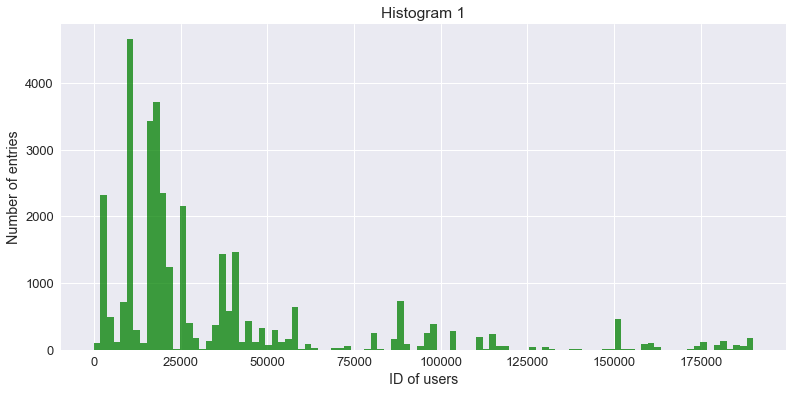

In [6]:
sns.set(font_scale=1.3, rc={"figure.figsize": (13, 6)})
plt.hist(data['ID'], 100, facecolor='g', alpha=0.75)
plt.xlabel('ID of users')
plt.ylabel('Number of entries')
plt.title('Histogram 1')
plt.grid(True)
plt.show()

In [7]:
import datetime
d=data['Date']
dates=d.astype(str)
dates = [datetime.datetime.strptime(d,"%d.%m.%Y") for d in dates]
dates

[datetime.datetime(2017, 3, 27, 0, 0),
 datetime.datetime(2010, 4, 28, 0, 0),
 datetime.datetime(2012, 6, 21, 0, 0),
 datetime.datetime(2010, 5, 14, 0, 0),
 datetime.datetime(2010, 5, 15, 0, 0),
 datetime.datetime(2010, 5, 17, 0, 0),
 datetime.datetime(2010, 5, 18, 0, 0),
 datetime.datetime(2010, 5, 19, 0, 0),
 datetime.datetime(2011, 4, 16, 0, 0),
 datetime.datetime(2012, 2, 21, 0, 0),
 datetime.datetime(2013, 1, 17, 0, 0),
 datetime.datetime(2013, 1, 18, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 8, 0, 0),
 datetime.datetime(2016, 3, 15, 0, 0),
 datetime.datetime(2009, 4, 23, 0, 0),
 datetime.datetime(2010, 3, 19, 0, 0),
 datetime.datetime(2014, 5, 17, 0, 0),
 datetime.datetime(2014, 5, 26, 0, 0),
 datetime.datetime(2014, 5, 27, 0, 0),
 datetime.datetime(2014, 5, 28, 0, 0),
 datetime.datetime(2014, 5, 29, 0, 0),
 datetime.datetime(2014, 5, 30, 0, 0),
 datetime.datetime(2014, 5, 31, 0, 0),
 datetime.datetime(2014, 6, 1, 0, 0),
 datetime.datetime(2014, 6,

In [8]:
list_year = []
list_months = []
for i in dates:
    list_year.append(i.year)
    list_months.append(i.month) # we need this line for Task3
list_year

[2017,
 2010,
 2012,
 2010,
 2010,
 2010,
 2010,
 2010,
 2011,
 2012,
 2013,
 2013,
 2011,
 2011,
 2016,
 2009,
 2010,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2012,
 2012,
 2012,
 2012,
 2012,
 2013,
 2013,
 2013,
 2010,
 2011,
 2011,
 2011,
 2012,
 2013,
 2015,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,

In [9]:
dates_series=pd.Series(list_year)
dates_series.value_counts()

2014    5623
2013    5617
2012    5190
2015    3686
2016    3677
2011    3669
2017    2473
2010    2296
2009     905
dtype: int64

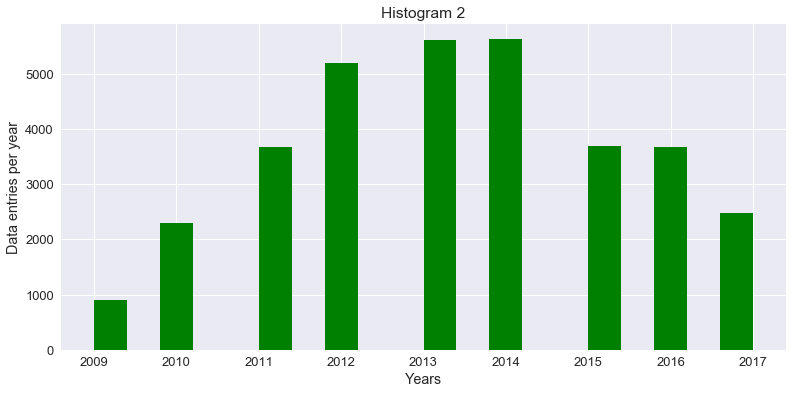

In [10]:
plt.hist(list_year, 20, facecolor='g')
plt.xlabel('Years')
plt.ylabel('Data entries per year')
plt.title('Histogram 2')
plt.grid(True)
plt.show()

In [11]:
niz=np.array(list_year)
year = {}
ID_perYear = []
for y in range(2009,2018):   
    year[y] = []
    for i in range(niz.shape[0]):
        if niz[i] == y:
            year[y].append(data['ID'][i])
    ID_perYear.append(year[y])
    
ID_perYear = np.array(ID_perYear)

In [12]:
year[2017] # IDs of users in year 2017

[165177,
 171975,
 171975,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 9862,
 188353,
 188353,
 3688,
 3688,
 3688,
 3688,
 3688,
 3688,
 3688,
 3688,
 3688,
 3688,
 171861,
 171861,
 189402,
 189402,
 189402,
 189402,
 189402,
 189402,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 188066,
 39666,
 39666,
 39666,
 189341,
 189341,
 11640,
 11640,
 11640,
 11640,
 11640,
 11640,
 11640,
 11640,
 11640,
 11640,
 19565,
 19565,
 19565,
 19565,
 19565,
 182831,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 189410,
 160331,
 160331,
 160331,
 160331,
 160331,
 160331,
 160331,
 1603

In [13]:
IDs_in_2017 = pd.Series(year[2017]).unique()
IDs_in_2017

array([165177, 171975,   9862, 188353,   3688, 171861, 189402, 188066,
        39666, 189341,  11640,  19565, 182831, 189410, 160331, 112056,
       103587, 172621,  35052, 179576, 189330,   3045, 115347,  47481,
       188113, 189238, 189294, 180540, 163862, 176005, 188405, 152498,
        98015,  97094, 158832, 187551, 189166, 159478,  17345, 152384,
       188923, 174011, 185596,   3318, 189674, 156763, 159618, 179024,
       181206, 187578, 119219,  86998,  21089, 189762,  45198, 151067,
       115476, 171713,  12388, 189723, 162403,  16796, 155559, 150269,
       115388,  58469,  17668, 189360, 117127, 160856, 189964, 179292,
         9833, 189404, 118909,   2747,   7616, 163238,  21972,  96519,
       150847,  40394,   3107, 188365,  39575, 188340,  89069, 159005,
       179803,   9777, 190082, 150256, 183079, 189514,  49363,  48868,
        25681,  19964,  72970, 185463], dtype=int64)

[ 2449  2796  3878  3748  3860  2819  3688  3016  3659  2453  3747  2942
  2080  3703  3702  3331  2662  3611  3571  3543  2365  3803  3897  1979
  2527  2813  3473  2729  3045  3884  3832  2636  1914  3244  2017  3781
  2646  3831  2544  2736  1723  3709  3837  1755  3641  3631  3742  3880
  3211  3675  3843  2124  2422  3669  2411  2480  3739  2852  3575  1807
  1772 17345  3381  3815  2775  3438  2068  3696  3814  3852  2046  2105
  2603  3185  3386  3301  3728  1712  2780  2638  3849  2053  3418  1696
  3809  3353  3648  3668  2573  3642  3574  2392  2349  2747  3587  2657
  2079  1711  3829     5  3617  3573  3672  1884  2612  3479  3082  2135
  3615  3107  3651  3820  2510  3714  2460  3678  3859  2049  3706  3557
  3850  3584  2426  2670  1913]
Unique number of users in year 2009 :  125
[ 7402  7892  4873 10090  7624  9046  3860  9871  9523  9862  3688  9741
  9300  9034  9939  4811  7310  9483 10021  2453 10044 10037  2942  2080
  6331  3702  8184  7667  2527  4202  3925  7621 

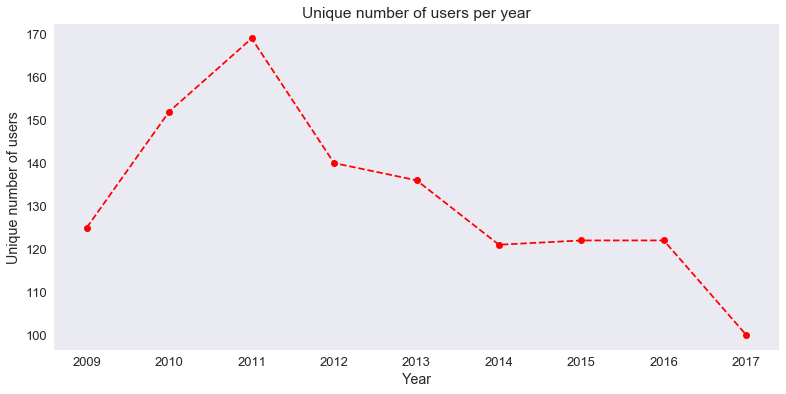

In [14]:
years = np.array(np.arange(2009, 2018))
Unique_NumberOfUsers_perYear=[]
for i in range(ID_perYear.shape[0]):
    print(pd.Series(ID_perYear[i]).unique())
    print('Unique number of users in year', years[i] ,': ' , pd.Series(ID_perYear[i]).unique().shape[0])
    Unique_NumberOfUsers_perYear.append(pd.Series(ID_perYear[i]).unique().shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
plt.plot(years, Unique_NumberOfUsers_perYear,'ro--')
plt.xlabel('Year')
plt.ylabel('Unique number of users')
plt.title('Unique number of users per year')
plt.show()
fig.savefig('UniqueNumberOfUsers.png')

# Task 2

In [15]:
symptoms = data.iloc[:,5:27]
symptoms['Overall Symptoms Score'] = data['Overall Symptoms Total']
symptoms.head()

,Overall Symptoms,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,Eye Watering,Eye Total 1,Eye Total 2,Nose Symptoms,Nose Itching,...,Nose Total 1,Nose Total 2,Lungs Symptoms,Lungs Wheezing,Lungs Shortness of Breath,Lungs Cough,Lungs Asthma,Lungs Total 1,Lungs Total 2,Overall Symptoms Score
0,9,2,0,0,0,1,3,4,3,1,...,6,7,0,0,0,0,0,0,0,11
1,7,1,1,0,0,0,2,2,1,1,...,2,2,1,0,1,1,0,3,3,7
2,7,1,1,0,0,0,2,2,1,1,...,3,4,0,0,0,0,0,0,0,6
3,9,1,1,0,0,0,2,3,3,1,...,7,9,0,0,0,0,0,0,0,11
4,9,2,1,0,0,1,4,5,3,1,...,7,9,0,0,0,0,0,0,0,13


In [16]:
correlations_between_sym = symptoms.corr()
correlations_between_sym

,Overall Symptoms,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,Eye Watering,Eye Total 1,Eye Total 2,Nose Symptoms,Nose Itching,...,Nose Total 1,Nose Total 2,Lungs Symptoms,Lungs Wheezing,Lungs Shortness of Breath,Lungs Cough,Lungs Asthma,Lungs Total 1,Lungs Total 2,Overall Symptoms Score
Overall Symptoms,1.000000,0.470701,0.384022,0.239222,0.310000,0.312464,0.467877,0.485910,0.555309,0.323592,...,0.555557,0.561616,0.387747,0.204659,0.243577,0.298012,0.160354,0.386884,0.386884,0.598785
Eye Symptoms,0.470701,1.000000,0.751892,0.537832,0.610467,0.586029,0.960287,0.909751,0.621368,0.483052,...,0.634301,0.611076,0.333292,0.235048,0.231305,0.229734,0.046332,0.320841,0.320841,0.791877
Eye Itching,0.384022,0.751892,1.000000,0.335452,0.392036,0.383507,0.794269,0.730786,0.487708,0.492002,...,0.534257,0.495657,0.223968,0.177607,0.178137,0.159311,-0.027389,0.213073,0.213073,0.632356
Eye Foreign Body,0.239222,0.537832,0.335452,1.000000,0.348550,0.249133,0.617920,0.593974,0.336124,0.306000,...,0.359110,0.355892,0.160891,0.130461,0.161615,0.100313,0.006555,0.162114,0.162114,0.478603
Eye Redness,0.310000,0.610467,0.392036,0.348550,1.000000,0.430900,0.706138,0.683996,0.371154,0.333546,...,0.407036,0.407672,0.233602,0.178736,0.154361,0.201099,0.136765,0.257258,0.257258,0.565556
Eye Watering,0.312464,0.586029,0.383507,0.249133,0.430900,1.000000,0.668726,0.619467,0.407854,0.304726,...,0.452030,0.422405,0.238096,0.203924,0.159330,0.189634,0.049515,0.243779,0.243779,0.550347
Eye Total 1,0.467877,0.960287,0.794269,0.617920,0.706138,0.668726,1.000000,0.943876,0.608399,0.515227,...,0.644697,0.618767,0.323632,0.245262,0.236568,0.234645,0.050550,0.321003,0.321003,0.810126
Eye Total 2,0.485910,0.909751,0.730786,0.593974,0.683996,0.619467,0.943876,1.000000,0.622462,0.495195,...,0.649869,0.701500,0.372825,0.262855,0.250738,0.288311,0.142954,0.384015,0.384015,0.873510
Nose Symptoms,0.555309,0.621368,0.487708,0.336124,0.371154,0.407854,0.608399,0.622462,1.000000,0.532611,...,0.945404,0.919681,0.387710,0.240030,0.237233,0.298973,0.008905,0.360831,0.360831,0.838430
Nose Itching,0.323592,0.483052,0.492002,0.306000,0.333546,0.304726,0.515227,0.495195,0.532611,1.000000,...,0.651519,0.608662,0.166888,0.151650,0.160773,0.117267,-0.026791,0.166072,0.166072,0.571896


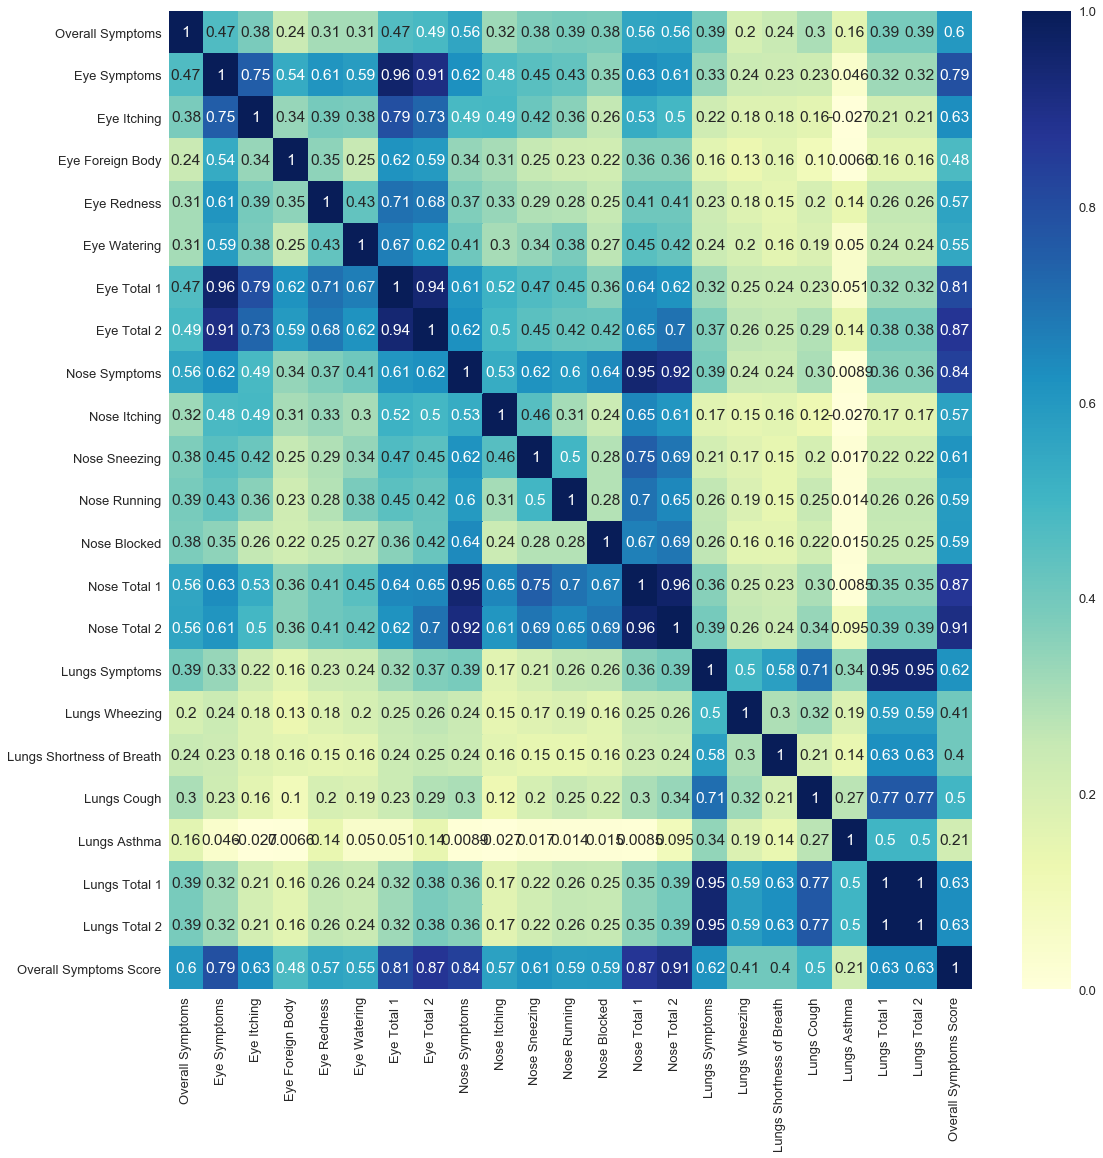

In [17]:
fig=plt.figure(figsize=(18, 18))
sns.heatmap(correlations_between_sym, annot=True,vmin=0, vmax=1, cmap="YlGnBu")
plt.show()

# Task3

In [18]:
array_months = np.array(list_months)
array_months

array([3, 4, 6, ..., 7, 8, 8])

In [19]:
month = {}
OverallSymptoms_perMonths = []
for m in range(1,13): 
    month[m] = []   
    for j in range(array_months.shape[0]):
        if array_months[j] == m:
            month[m].append((data['Overall Symptoms Total'][j]))
    OverallSymptoms_perMonths.append(month[m])

In [20]:
Sum_OverallSymptoms_perMonths = []
for months in OverallSymptoms_perMonths:
    Sum_OverallSymptoms_perMonths.append(np.array(months).sum())
Sum_OverallSymptoms_perMonths

[1902, 3136, 9632, 20256, 16566, 11707, 8709, 30281, 29393, 6304, 2613, 2170]

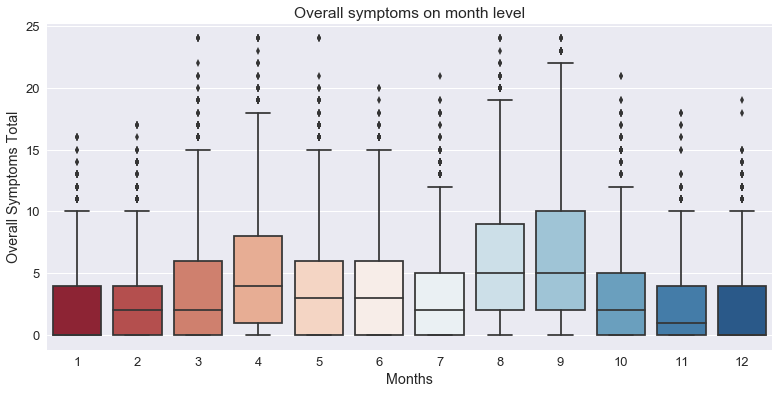

In [21]:
sns.set(font_scale=1.3, rc={"figure.figsize": (13, 6)})
sns.boxplot(x = array_months, y = 'Overall Symptoms Total', data = data, palette = "RdBu")
plt.xlabel('Months')
plt.title('Overall symptoms on month level')
plt.show()

In [22]:
medical_treatments = data.iloc[:, 27:33]
medical_treatments.head()

,Medicine Eye Drops,Medicine Nose Drops,Medicine Tablets,Medicine Homoepathic,Medicine Other,Medicine None
0,1,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,1,0
4,0,1,0,0,1,0


In [23]:
counts_of_medicalTreatments = []
percentage_of_use_of_medicalTreatment = []
for i in range(medical_treatments.shape[1]):
    counts_of_medicalTreatments.append((medical_treatments.iloc[:, i].sum())) #/medical_treatments.shape[0])
    percentage_of_use_of_medicalTreatment.append(((medical_treatments.iloc[:, i].sum()) /medical_treatments.shape[0])* 100)
    print(str(percentage_of_use_of_medicalTreatment[i])+ ' %')
counts_of_medicalTreatments

7.9400048285852245 %
25.79068083051666 %
20.440004828585224 %
6.041767262192177 %
18.448213423466925 %
53.02691936262674 %


[2631, 8546, 6773, 2002, 6113, 17571]

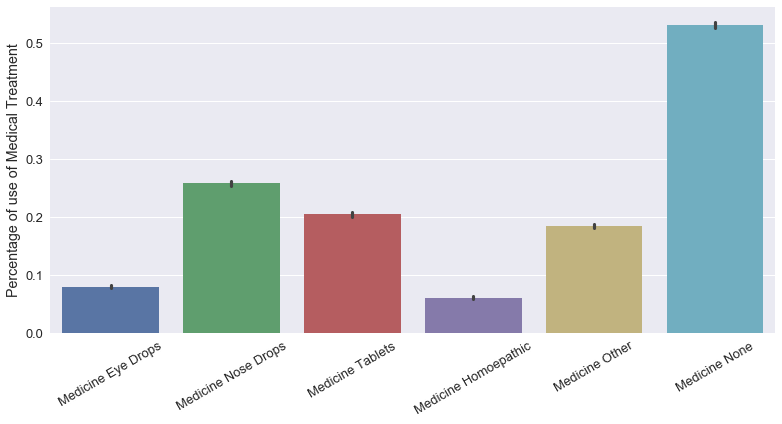

In [24]:
cp = sns.barplot(data = medical_treatments);
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel('Percentage of use of Medical Treatment')
plt.show()

# Task 4

In [25]:
data1 = []
y=[]
for i in range(2009,2018): y.append('%d'%i)
for year in y:
    data1.append(pd.read_excel('ParticleCountDaily_NS_2009-2017.xlsx', year, na_values = 'na'))
data1

[     2009  ACER  AESC  ALNU  AMBR  APIA  ARTE  ASTE  BETU  BROU  ...   QUER  \
 0       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 1       2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 2       3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 3       4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 4       5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 5       6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 6       7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 7       8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 8       9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 9      10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 10     11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
 11     12   NaN   NaN   NaN   NaN   NaN

In [26]:
data1[1].head() #Particle daily count for 2010

,2010,ACER,AESC,ALNU,AMBR,APIA,ARTE,ASTE,BETU,BROU,...,QUER,RUME,SALI,TARA,TAXU,TILI,TYPH,ULMU,URTI,XANT
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


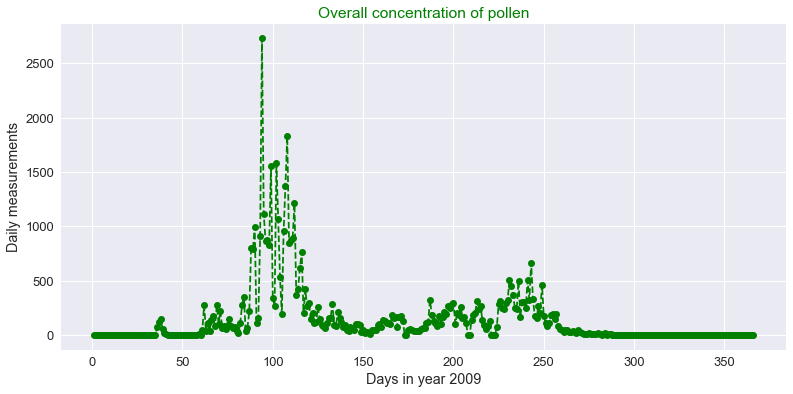

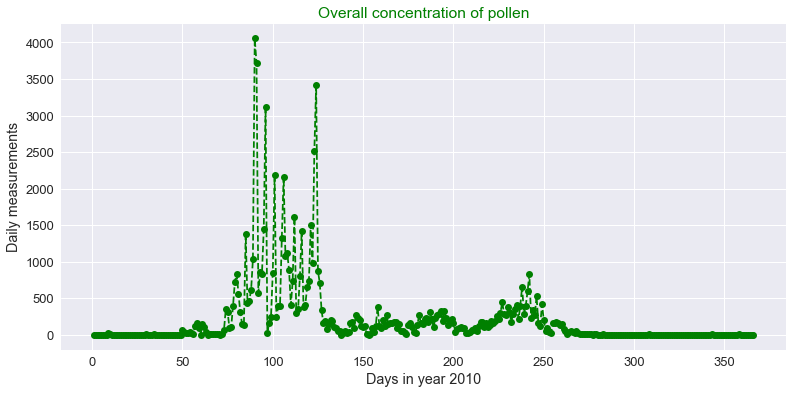

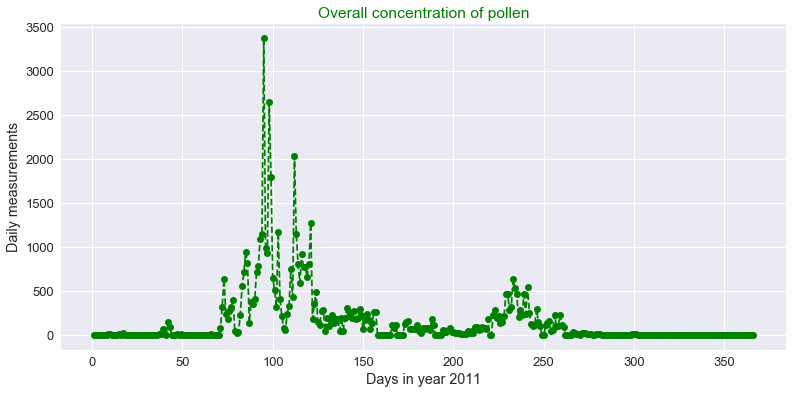

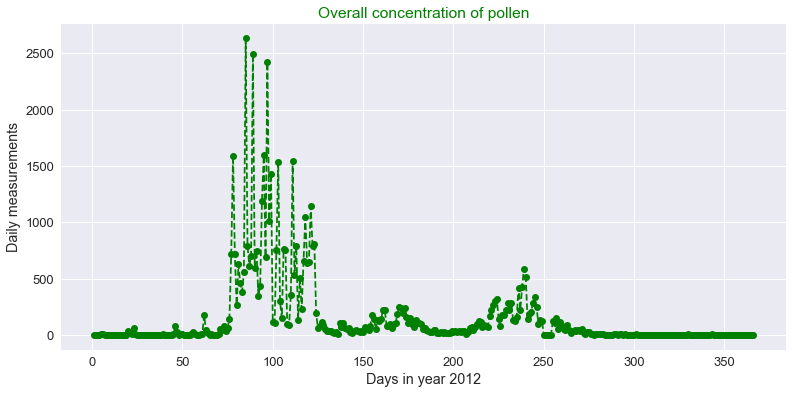

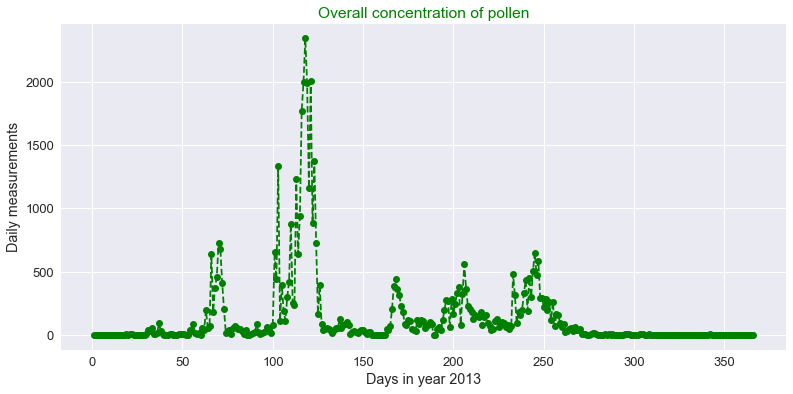

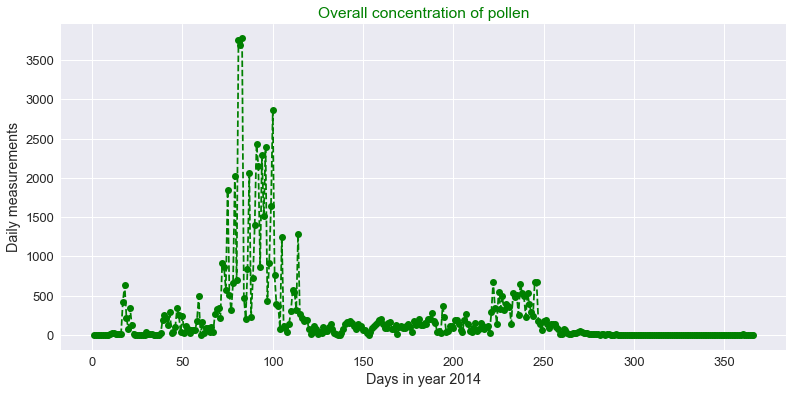

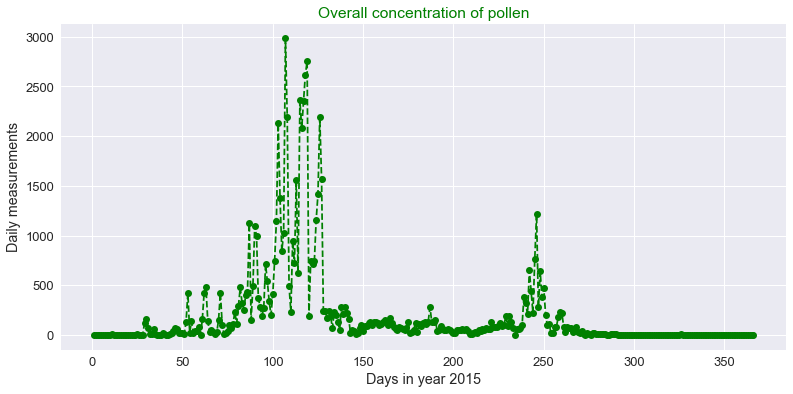

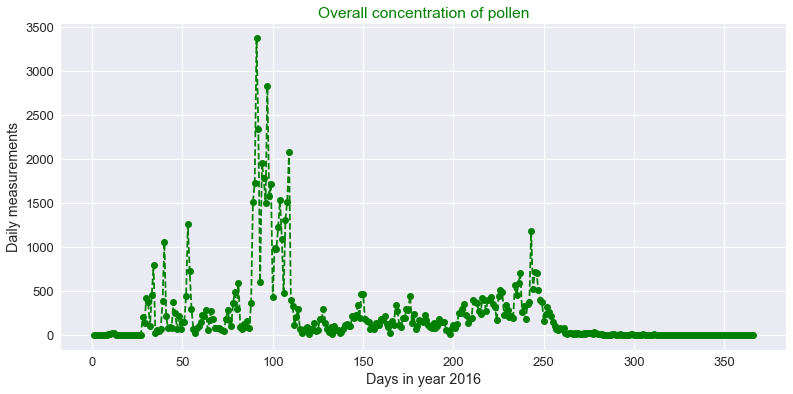

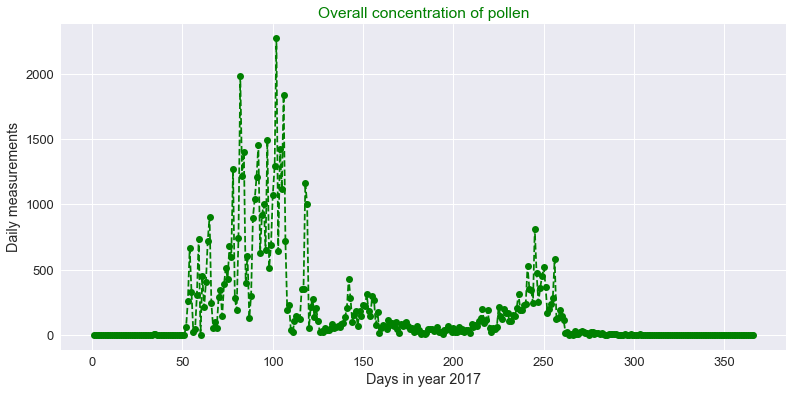

[0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
 5      0.0
 6      0.0
 7      0.0
 8      0.0
 9      0.0
 10     0.0
 11     0.0
 12     0.0
 13     0.0
 14     0.0
 15     0.0
 16     0.0
 17     0.0
 18     0.0
 19     0.0
 20     0.0
 21     0.0
 22     0.0
 23     0.0
 24     0.0
 25     0.0
 26     0.0
 27     0.0
 28     0.0
 29     0.0
       ... 
 336    0.0
 337    0.0
 338    0.0
 339    0.0
 340    0.0
 341    0.0
 342    0.0
 343    0.0
 344    0.0
 345    0.0
 346    0.0
 347    0.0
 348    0.0
 349    0.0
 350    0.0
 351    0.0
 352    0.0
 353    0.0
 354    0.0
 355    0.0
 356    0.0
 357    0.0
 358    0.0
 359    0.0
 360    0.0
 361    0.0
 362    0.0
 363    0.0
 364    0.0
 365    0.0
 Length: 366, dtype: float64, 0       3.0
 1       1.0
 2       3.0
 3       3.0
 4       2.0
 5       1.0
 6       0.0
 7       6.0
 8      26.0
 9      12.0
 10      4.0
 11      1.0
 12      1.0
 13      0.0
 14      0.0
 15      2.0
 16      5.0
 17      5.0
 18  

In [27]:
lista = []
for i in range(len(y)):
    data1[i] = data1[i].fillna(0)
    lista.append(data1[i].iloc[:,1:].sum(axis=1))
    fig=plt.figure()
    plt.plot(np.arange(1,367), lista[i],'go--')
    plt.xlabel('Days in year ' + str(y[i]))
    plt.ylabel('Daily measurements')
    plt.title('Overall concentration of pollen', color = 'green')
    plt.show()
lista    

# Task 5

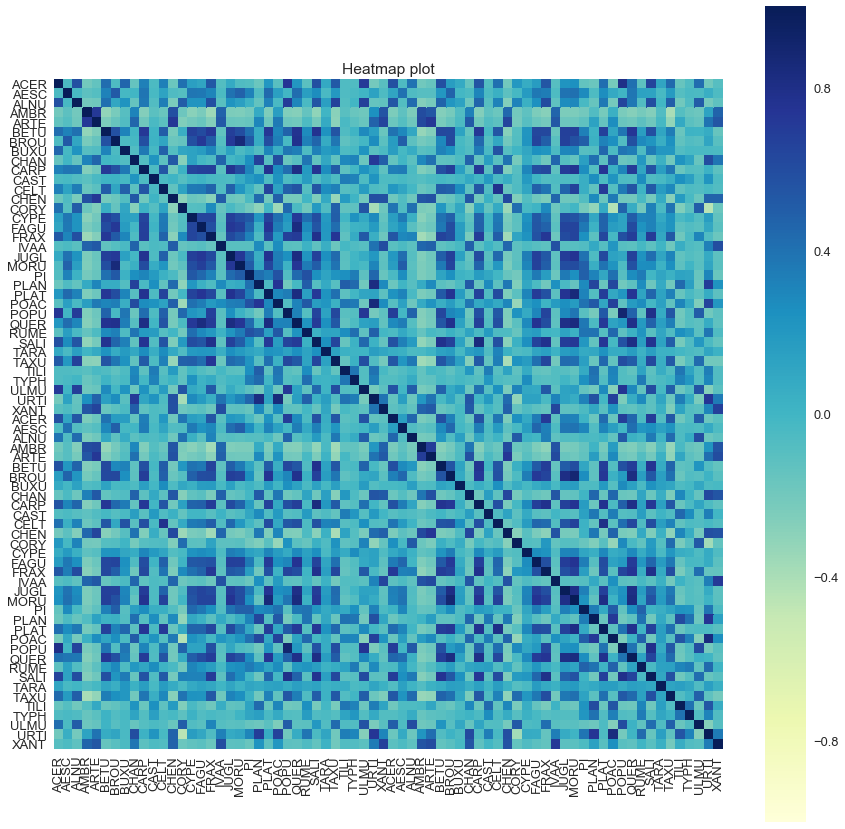

([array([[ 1.        , -0.04476725,  0.58219527, ...,  0.42524647,
          -0.19486948, -0.08863656],
         [-0.04476725,  1.        , -0.02754502, ..., -0.04652736,
           0.05159195, -0.0499145 ],
         [ 0.58219527, -0.02754502,  1.        , ...,  0.50800924,
          -0.21044932, -0.11790022],
         ..., 
         [ 0.42524647, -0.04652736,  0.50800924, ...,  1.        ,
          -0.27030501, -0.09212147],
         [-0.19486948,  0.05159195, -0.21044932, ..., -0.27030501,
           1.        ,  0.35324691],
         [-0.08863656, -0.0499145 , -0.11790022, ..., -0.09212147,
           0.35324691,  1.        ]]),
  array([[ 1.        , -0.04476725,  0.58219527, ...,  0.29110939,
          -0.20020056, -0.09720944],
         [-0.04476725,  1.        , -0.02754502, ..., -0.00863998,
          -0.06508912, -0.05474221],
         [ 0.58219527, -0.02754502,  1.        , ...,  0.36211639,
          -0.24982587, -0.13000654],
         ..., 
         [ 0.29110939, -0.008639

In [28]:
# rho - Spearman correlation matrix or correlation coefficient
# pval - The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, 
         #has same dimension as rho.
#Spearman correlation between seasons 2011,...2017
r = [] 
p = [] 
for i in range(2, len(y)):
    for j in range(2, len(y)):
        if i == j:
            continue
        else:
            rho1, pval1 = stats.spearmanr(data1[i].iloc[:,1:], data1[j].iloc[:,1:]) #I remove days in year, we consider only concentrations
            r.append(rho1)
            p.append(pval1) 

fig=plt.figure(figsize=(15, 15))
# r[0] Spearman correlation mx between seasons 2011 and 2012
sns.heatmap(r[0], square=True, vmin = -1, vmax = 1, xticklabels = ['ACER', 'AESC', 'ALNU', 'AMBR', 'ARTE', 'BETU', 'BROU','BUXU','CHAN', 'CARP','CAST','CELT','CHEN','CORY', 'CYPE', 'FAGU','FRAX','IVAA','JUGL', 'MORU', 'PI', 'PLAN', 'PLAT', 'POAC', 'POPU','QUER','RUME','SALI', 'TARA', 'TAXU', 'TILI', 'TYPH', 'ULMU', 'URTI', 'XANT', 'ACER', 'AESC', 'ALNU', 'AMBR', 'ARTE', 'BETU', 'BROU','BUXU','CHAN', 'CARP','CAST','CELT','CHEN','CORY', 'CYPE', 'FAGU','FRAX','IVAA','JUGL', 'MORU', 'PI', 'PLAN', 'PLAT', 'POAC', 'POPU','QUER','RUME','SALI', 'TARA', 'TAXU', 'TILI', 'TYPH', 'ULMU', 'URTI', 'XANT'], 
                            yticklabels = ['ACER', 'AESC', 'ALNU', 'AMBR', 'ARTE', 'BETU', 'BROU','BUXU','CHAN', 'CARP','CAST','CELT','CHEN','CORY', 'CYPE', 'FAGU','FRAX','IVAA','JUGL', 'MORU', 'PI', 'PLAN', 'PLAT', 'POAC', 'POPU','QUER','RUME','SALI', 'TARA', 'TAXU', 'TILI', 'TYPH', 'ULMU', 'URTI', 'XANT', 'ACER', 'AESC', 'ALNU', 'AMBR', 'ARTE', 'BETU', 'BROU','BUXU','CHAN', 'CARP','CAST','CELT','CHEN','CORY', 'CYPE', 'FAGU','FRAX','IVAA','JUGL', 'MORU', 'PI', 'PLAN', 'PLAT', 'POAC', 'POPU','QUER','RUME','SALI', 'TARA', 'TAXU', 'TILI', 'TYPH', 'ULMU', 'URTI', 'XANT'], cmap="YlGnBu") 
plt.title('Heatmap plot')
plt.show()
r, len(r)   #we will have 42 Spearman  correlation mx, because we compare 7 seasons of pollen with other 6 seasons
            # 2011 with 2012,2013,..,2017
            # 2012 with 2011, 2013,..., 2017   etc.

In [29]:
#Spearman correlation between seasons 2009 and 2010 (Other seasons have smaller number of types of pollen(attributes))
rho, pval = stats.spearmanr(data1[0].iloc[:,1:], data1[1].iloc[:,1:])
rho

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


array([[ 1.        , -0.03448471,  0.28368112, ...,  0.56936982,
        -0.22477227, -0.09514832],
       [-0.03448471,  1.        , -0.0433882 , ..., -0.04056622,
         0.05920708, -0.03821531],
       [ 0.28368112, -0.0433882 ,  1.        , ...,  0.50780413,
        -0.17168621, -0.11971433],
       ..., 
       [ 0.56936982, -0.04056622,  0.50780413, ...,  1.        ,
        -0.25182212, -0.11192808],
       [-0.22477227,  0.05920708, -0.17168621, ..., -0.25182212,
         1.        ,  0.39022401],
       [-0.09514832, -0.03821531, -0.11971433, ..., -0.11192808,
         0.39022401,  1.        ]])

# Task 6

In [30]:
user = [] #posto radimo sa koncentracijama polena za Novi Sad izdvojila sam korisnike iz Vojvodine
for i in range(data.shape[0]):
    if data['Region'][i] == 'yuvojvod':
        user.append(data['ID'][i])
u = pd.Series(user).value_counts()
u

16796     2251
10021     1515
37561     1141
17345      612
17119      583
2747       567
7616       561
9530       492
9516       356
25681      287
19934      264
2729       223
19964      222
44292      202
112056     187
3709       185
17668      175
2135       169
3688       156
51698      151
40062      147
16721      140
40124      139
52292      139
115347     138
24919      122
176005     116
38948      115
19565      104
96381       99
          ... 
57023        1
9856         1
25474        1
189330       1
25640        1
21470        1
15139        1
17422        1
189674       1
10813        1
36412        1
57860        1
40046        1
9939         1
9523         1
56396        1
95635        1
6932         1
8947         1
17103        1
3386         1
96920        1
2646         1
188923       1
46747        1
151487       1
7621         1
4044         1
40309        1
2049         1
Length: 401, dtype: int64

In [31]:
users = u.index
users

Int64Index([ 16796,  10021,  37561,  17345,  17119,   2747,   7616,   9530,
              9516,  25681,
            ...
              3386,  96920,   2646, 188923,  46747, 151487,   7621,   4044,
             40309,   2049],
           dtype='int64', length=401)

In [32]:
top10_users = users[0:10] 
top10_users

Int64Index([16796, 10021, 37561, 17345, 17119, 2747, 7616, 9530, 9516, 25681], dtype='int64')

In [33]:
symptom = {} 
medicine = {} 
user_dates = {} 
UserDates = []  #lista svih user_dates
UserSymptoms = [] 
UserMedicine = [] 

for u in range(1,11):  
    symptom[u] = [] 
    medicine[u] = []
    user_dates[u] = []
    for j in range(data.shape[0]):
        if  data['ID'][j] == top10_users[u-1]:
            user_dates[u].append(datetime.datetime.strptime(data['Date'][j],"%d.%m.%Y"))
            symptom[u].append((data['Overall Symptoms Total'][j]))
            if u == 1 or u == 4 or u == 9: 
                medicine[u].append(data['Medicine Tablets'][j])
            else:
                medicine[u].append(data['Medicine Nose Drops'][j])
    UserDates.append(user_dates[u])
    UserSymptoms.append(symptom[u])
    UserMedicine.append(medicine[u])

In [34]:
user_dates[1] 

[datetime.datetime(2011, 6, 11, 0, 0),
 datetime.datetime(2011, 6, 13, 0, 0),
 datetime.datetime(2011, 6, 14, 0, 0),
 datetime.datetime(2011, 6, 15, 0, 0),
 datetime.datetime(2011, 6, 16, 0, 0),
 datetime.datetime(2011, 6, 18, 0, 0),
 datetime.datetime(2011, 6, 19, 0, 0),
 datetime.datetime(2011, 6, 20, 0, 0),
 datetime.datetime(2011, 6, 21, 0, 0),
 datetime.datetime(2011, 6, 22, 0, 0),
 datetime.datetime(2011, 6, 23, 0, 0),
 datetime.datetime(2011, 6, 27, 0, 0),
 datetime.datetime(2011, 6, 28, 0, 0),
 datetime.datetime(2011, 7, 1, 0, 0),
 datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2011, 7, 11, 0, 0),
 datetime.datetime(2011, 7, 12, 0, 0),
 datetime.datetime(2011, 7, 13, 0, 0),
 datetime.datetime(2011, 7, 16, 0, 0),
 datetime.datetime(2011, 7, 17, 0, 0),
 datetime.datetime(2011, 7, 19, 0, 0),
 datetime.datetime(2011, 7, 20, 0, 0),
 datetime.datetime(2011, 7, 22, 0, 0),
 datetime.datetime(2011, 7, 23, 0, 0),
 datetime.datetime(2011, 7, 24, 0, 0),
 datetime.datetime(2011, 7,

In [35]:
user_years={} 
UserYears=[]
index_Series_UserYears=[]
for u in range(1,11): 
    user_years[u]=[]
    for i in range(len(UserDates[u-1])):
        user_years[u].append(UserDates[u-1][i].year)
    UserYears.append(user_years[u])
    index_Series_UserYears.append(np.array((pd.Series(UserYears[u-1]).value_counts()).index)[0])
index_Series_UserYears    

[2016, 2014, 2016, 2016, 2012, 2010, 2011, 2012, 2011, 2013]

In [36]:
year_concentration = []
y = np.arange(2009, 2018)
x = np.arange(0, 9)
for i in range(len(index_Series_UserYears)):
    for j in range(len(y)):
        if index_Series_UserYears[i] == y[j]:
            year_concentration.append(x[j])
year_concentration #kroz ovu cu prolaziti listu cu prolaziti kad u sledecem kodu budem pozivala koncentracije polena za godinu

[7, 5, 7, 7, 3, 1, 2, 3, 2, 4]

The user 1  most used the application in year 2016 .


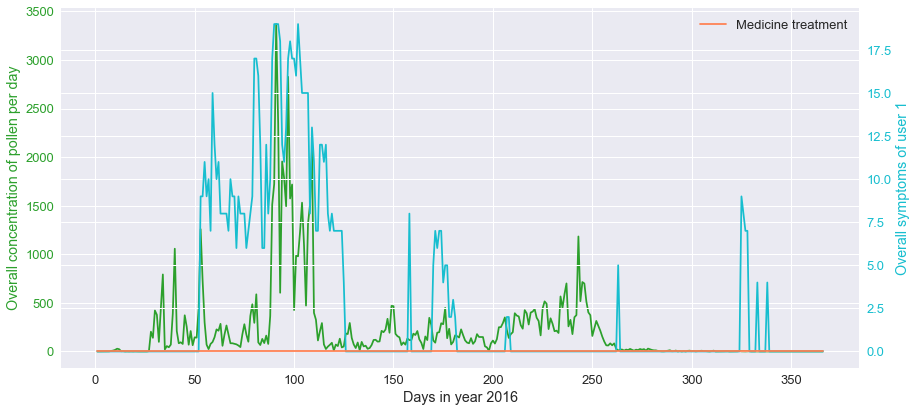

The user 2  most used the application in year 2014 .


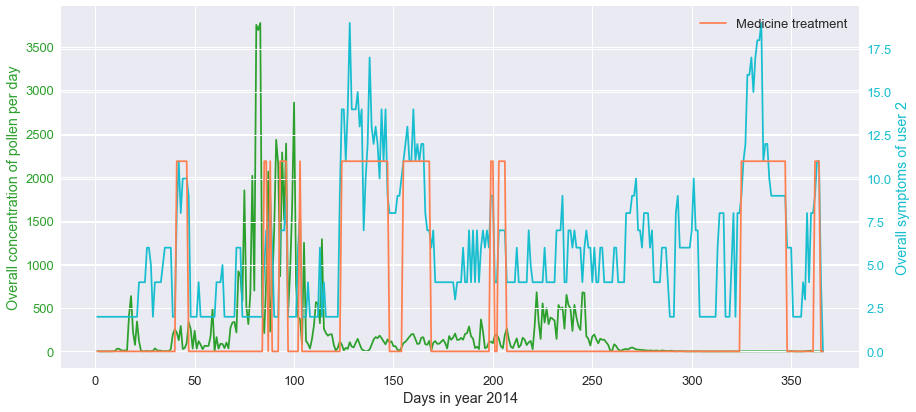

The user 3  most used the application in year 2016 .


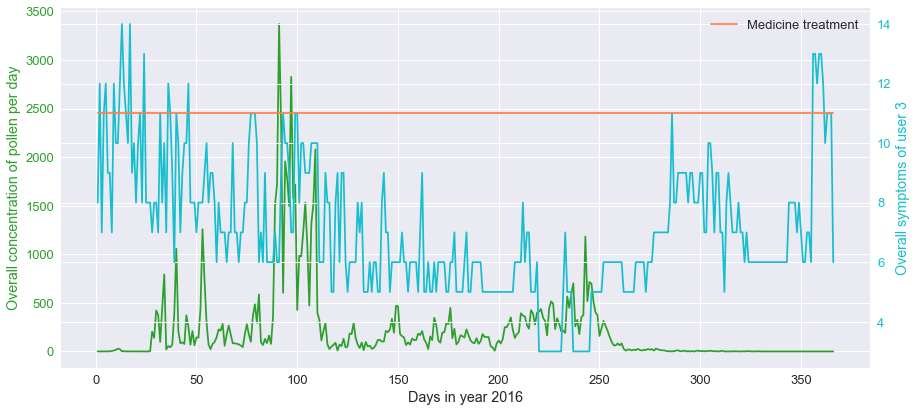

The user 4  most used the application in year 2016 .


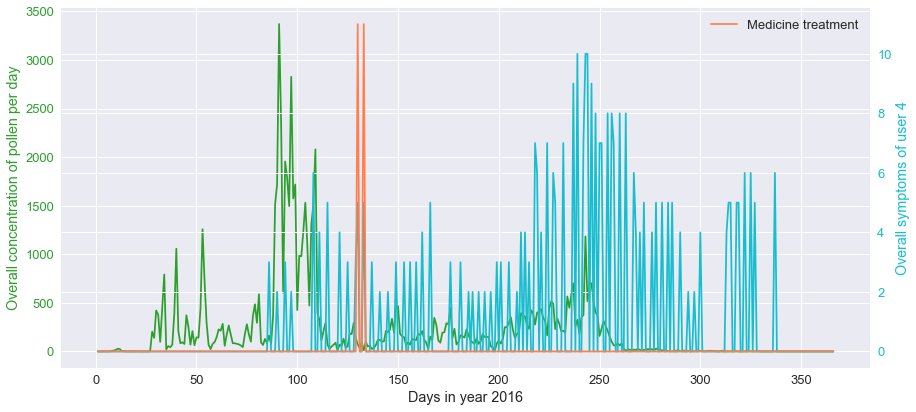

The user 5  most used the application in year 2012 .


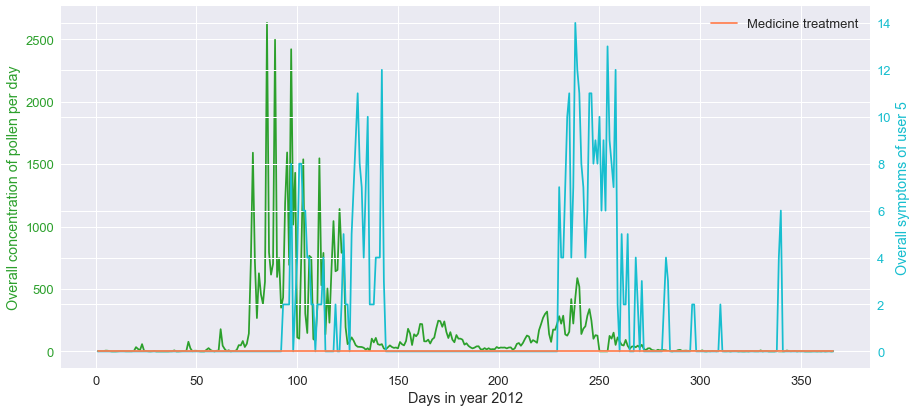

The user 6  most used the application in year 2010 .


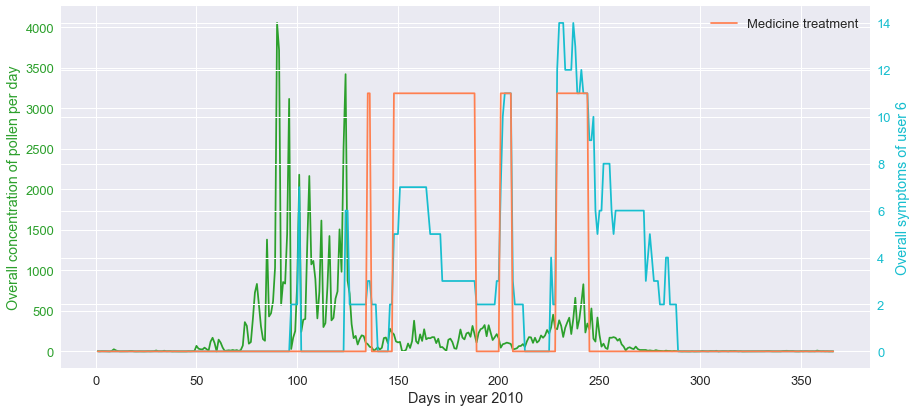

The user 7  most used the application in year 2011 .


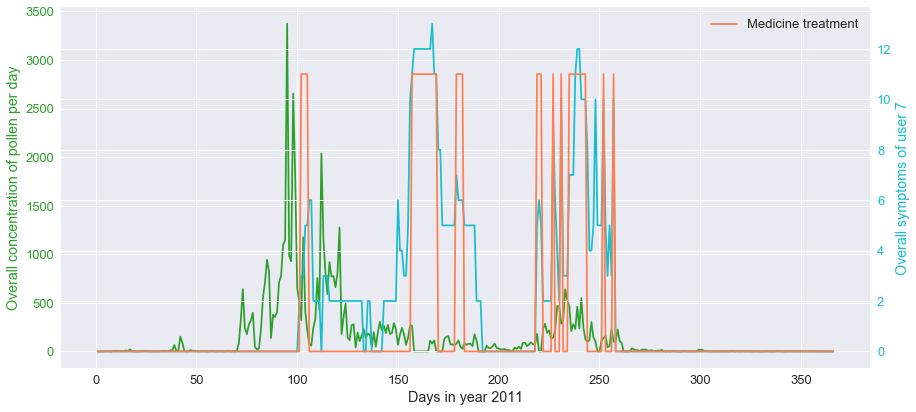

The user 8  most used the application in year 2012 .


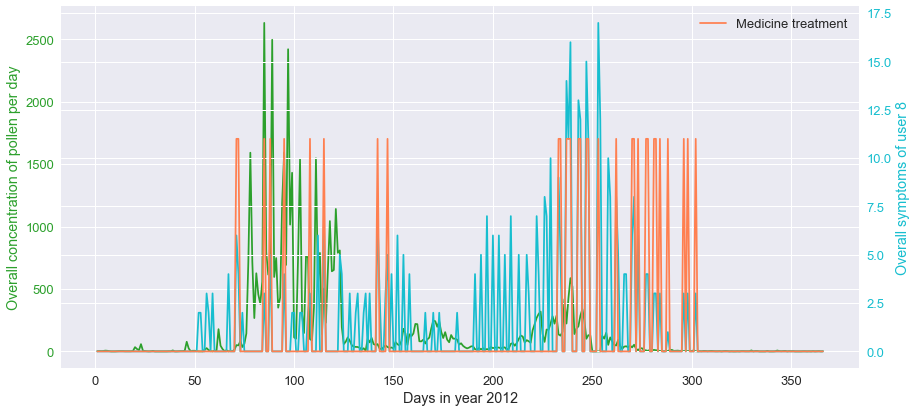

The user 9  most used the application in year 2011 .


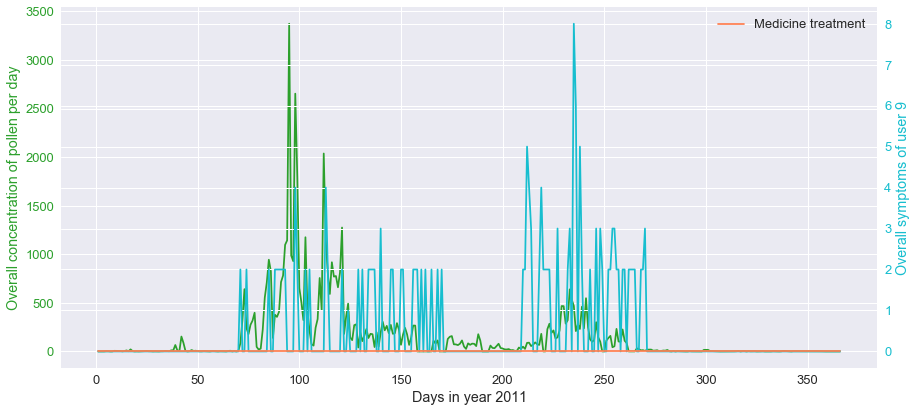

The user 10  most used the application in year 2013 .


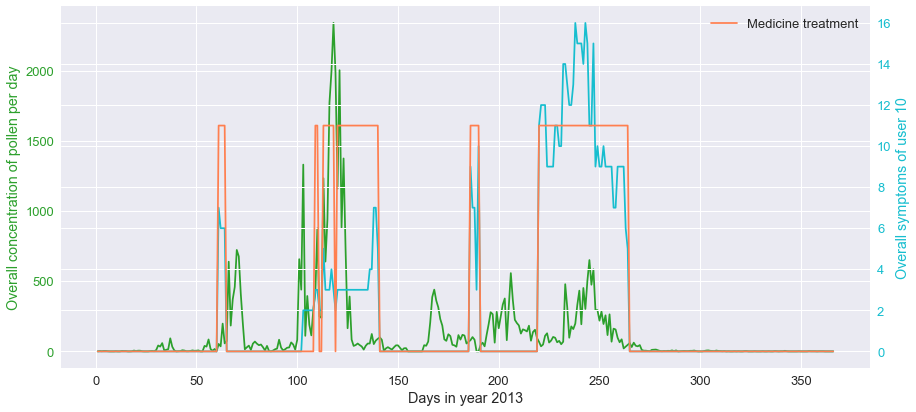

In [37]:
daysInYear={}
u_symptoms={} 
u_medicine={} 
for u, y in zip(range(1,11), year_concentration):
    daysInYear[u]=[]
    u_symptoms[u]=[]
    u_medicine[u]=[]
    for i in range(len(UserDates[u-1])):
        if UserDates[u-1][i].year == index_Series_UserYears[u-1]:
            daysInYear[u].append(UserDates[u-1][i].timetuple().tm_yday) #  %d.%m.%Y konvertuje u n-ti dan u godini za n=1,..,366
            u_symptoms[u].append(UserSymptoms[u-1][i])
            u_medicine[u].append(UserMedicine[u-1][i])
    for i in range(1, 367):
        if i in daysInYear[u]:
            pass
        else:
            daysInYear[u].insert(i-1, i)
            u_symptoms[u].insert(i-1, 0)
            u_medicine[u].insert(i-1, 0)
    print('The user',u,' most used the application in year', index_Series_UserYears[u-1],'.' )
    # Plots with different scales
    fig, ax1 = plt.subplots()
    color = 'tab:green'
    ax1.set_xlabel('Days in year ' +str(index_Series_UserYears[u-1]))
    ax1.set_ylabel('Overall concentration of pollen per day', color=color)
    ax1.plot(np.arange(1,367), lista[y], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    color = 'tab:cyan'
    ax2.set_ylabel('Overall symptoms of user ' +str(u), color=color)
    ax2.plot(daysInYear[u], u_symptoms[u], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.plot(daysInYear[u], u_medicine[u] * (np.ones(len(u_medicine[u])) + 10), 'coral', label = 'Medicine treatment')
    plt.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

# Task 7 (my own analysis step)

In [38]:
#Racunam koncentracije za svaku vrstu polena za svaku od 9 godina (2009 - 2017)
sumOfPolensPerYear = {}
for i in range(len(data1)):
    sumOfPolensPerYear[i] = data1[i].iloc[:, 1:].sum(axis=0)

Five types of pollen with the largest concentration in 2009. : ['URTI', 'AMBR', 'POPU', 'SALI', 'MORU']


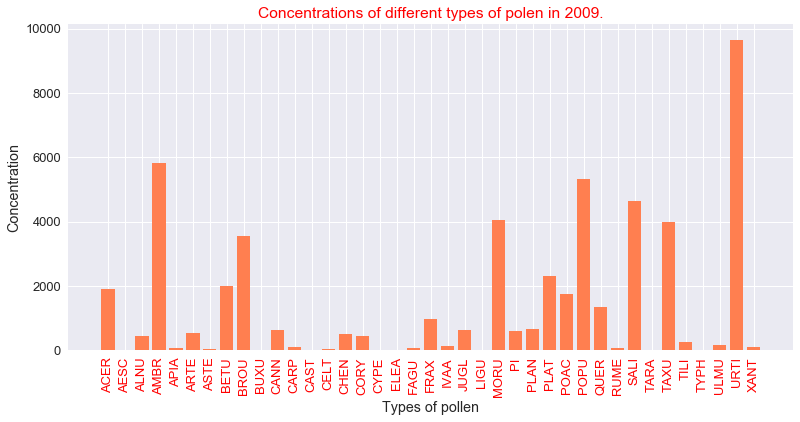

Five types of pollen with the largest concentration in 2010. : ['BETU', 'URTI', 'BROU', 'AMBR', 'POPU']


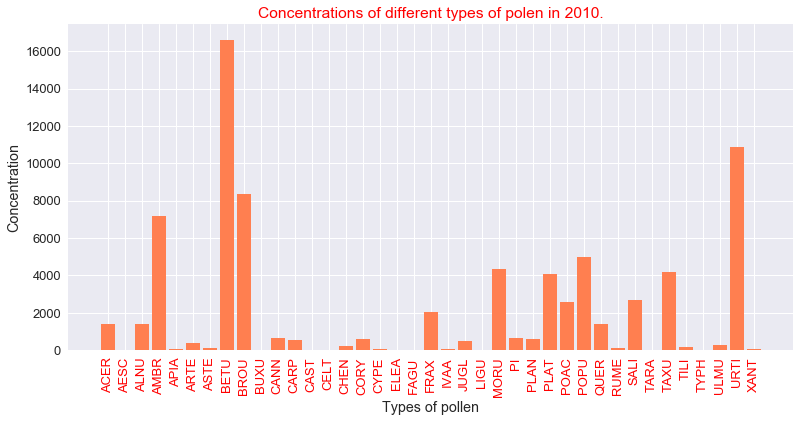

Five types of pollen with the largest concentration in 2011. : ['POPU', 'URTI', 'AMBR', 'BETU', 'BROU']


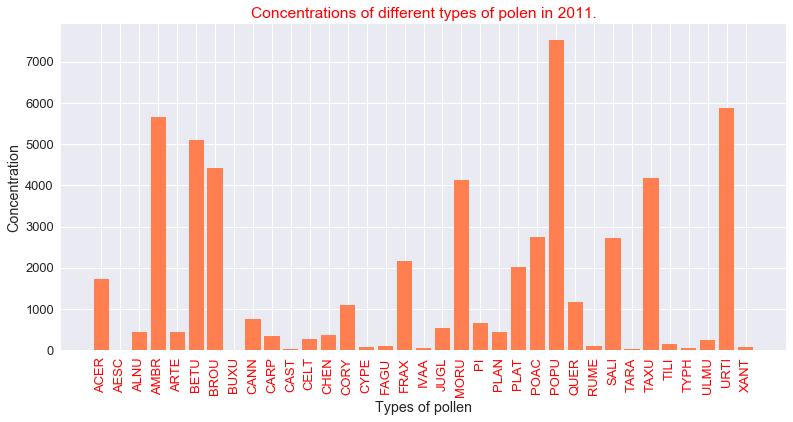

Five types of pollen with the largest concentration in 2012. : ['BETU', 'URTI', 'PLAT', 'AMBR', 'BROU']


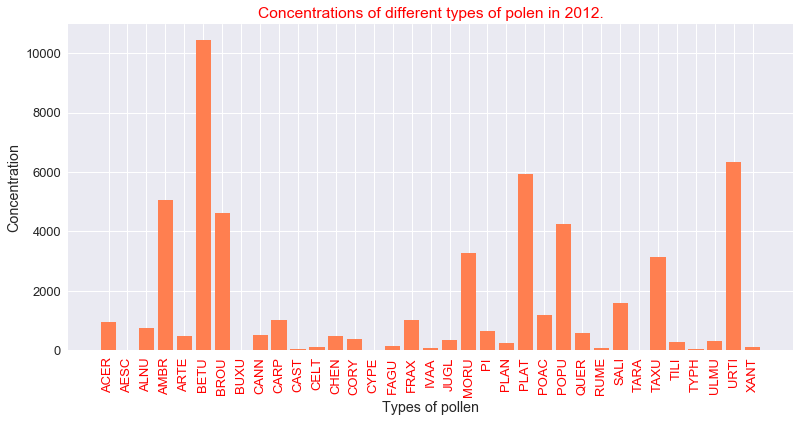

Five types of pollen with the largest concentration in 2013. : ['URTI', 'AMBR', 'BROU', 'MORU', 'SALI']


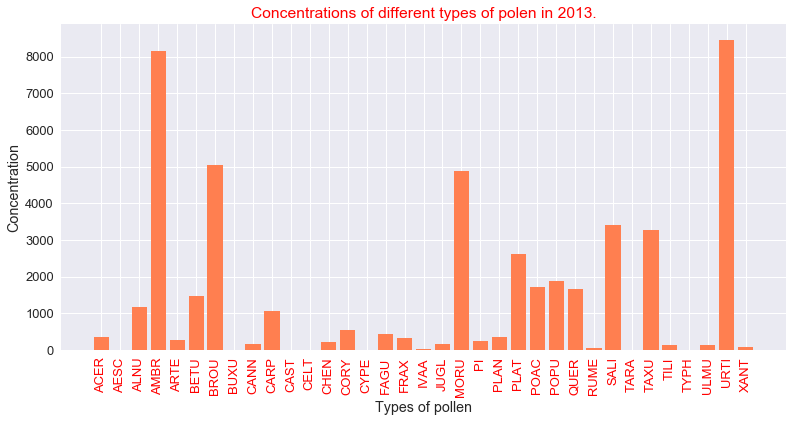

Five types of pollen with the largest concentration in 2014. : ['BETU', 'URTI', 'POPU', 'SALI', 'AMBR']


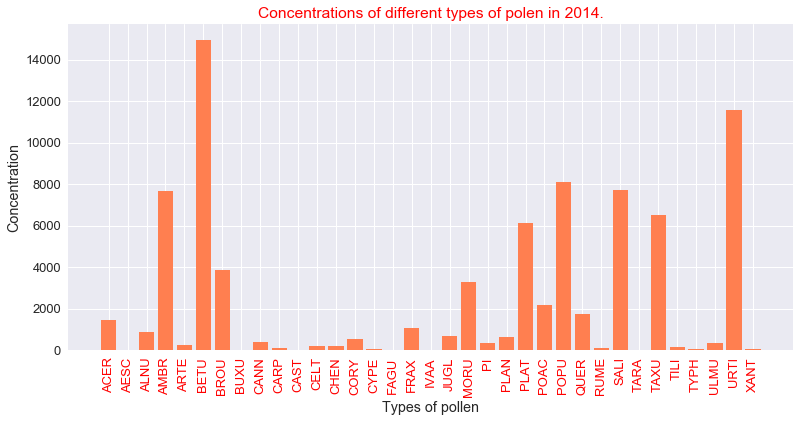

Five types of pollen with the largest concentration in 2015. : ['MORU', 'BROU', 'AMBR', 'PLAT', 'POPU']


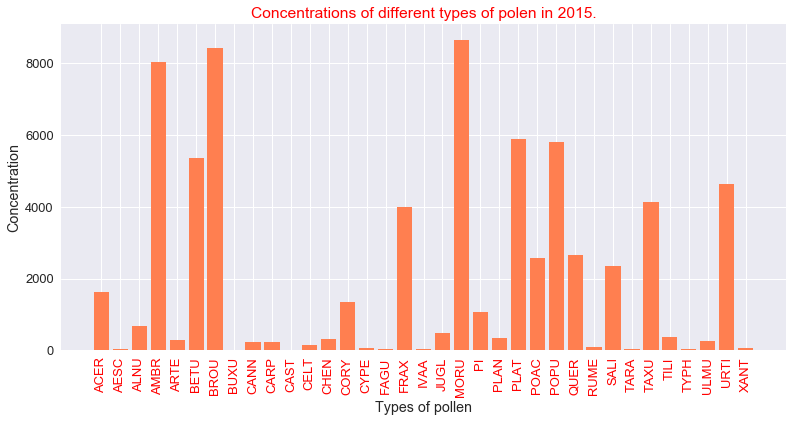

Five types of pollen with the largest concentration in 2016. : ['URTI', 'AMBR', 'BETU', 'TAXU', 'CARP']


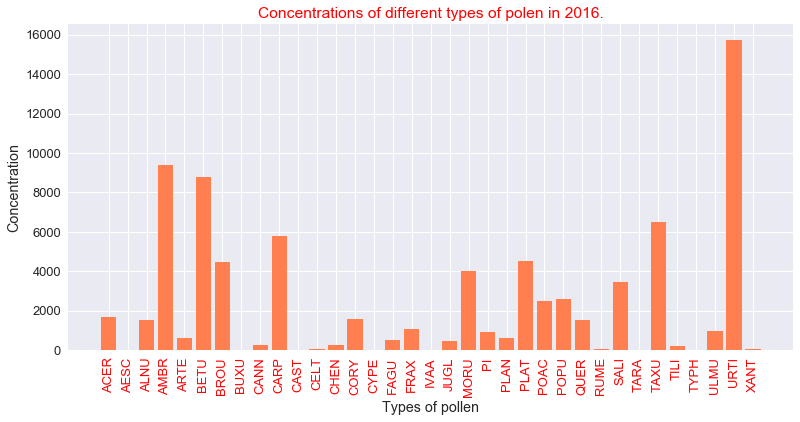

Five types of pollen with the largest concentration in 2017. : ['AMBR', 'MORU', 'POPU', 'SALI', 'URTI']


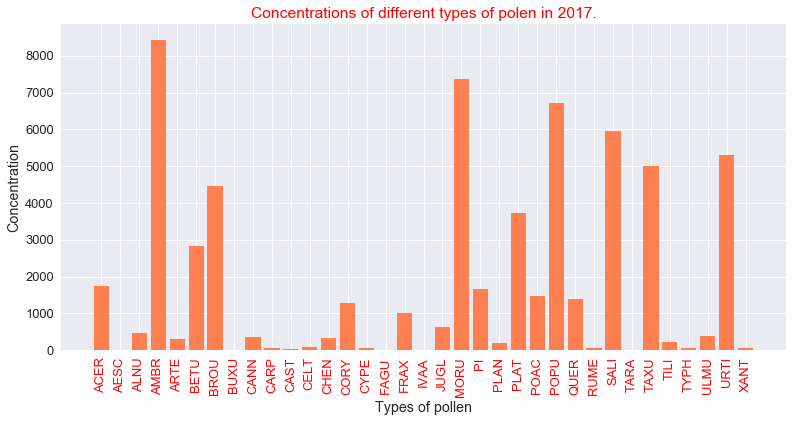

In [ ]:
#ovde te koncentarcije prikazujem graficki i trazim 5 vrsta polena koji imaju najvecu koncentraciju za datu godinu
for i, u in zip(range(len(sumOfPolensPerYear)), range(2009, 2018)):
    fig=plt.figure()
    labels = data1[i].iloc[0, 1:].index
    x = np.arange(len(sumOfPolensPerYear[i].values))
    plt.bar(x, np.array(sumOfPolensPerYear[i].values), color = 'coral' )
    plt.xticks(x, np.array(labels), rotation='vertical', color = 'red')
    plt.xlabel('Types of pollen')
    plt.ylabel('Concentration')
    plt.title('Concentrations of different types of polen in ' + str(u) +'.', color = 'red')
    print('Five types of pollen with the largest concentration in ' +str(u)+ '. :', list(pd.Series(sumOfPolensPerYear[i]).nlargest(5).index))
    plt.show()

User 1  most used the application in year 2016 .


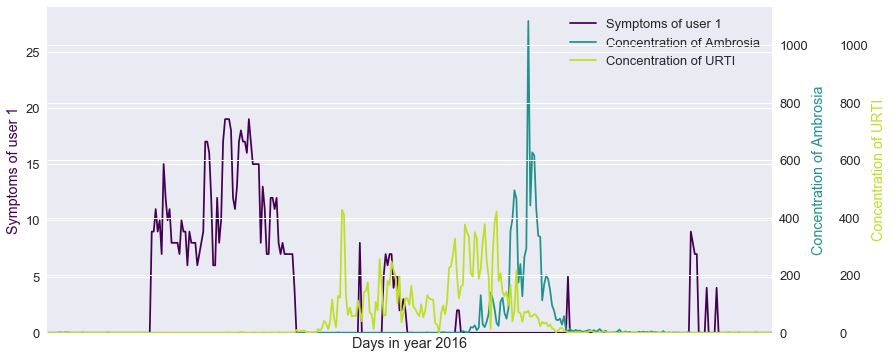

User 2  most used the application in year 2014 .


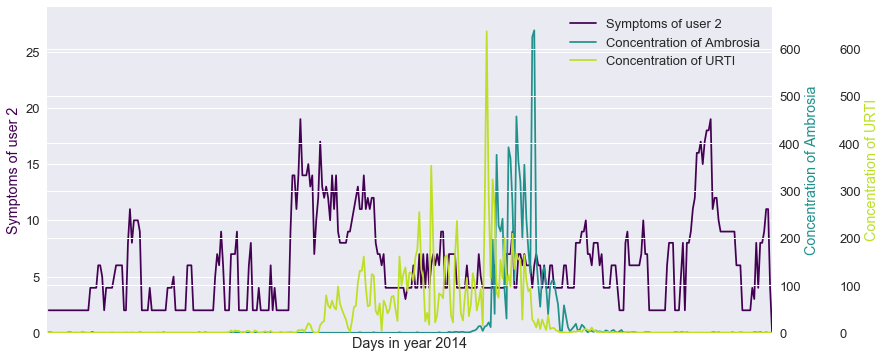

User 3  most used the application in year 2016 .


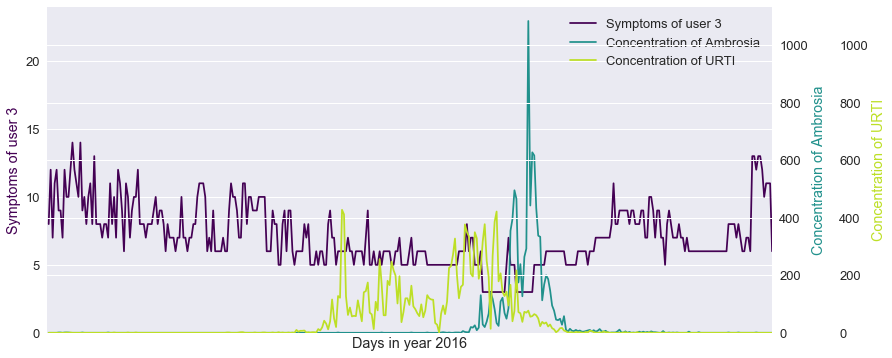

User 4  most used the application in year 2016 .


In [ ]:
#visoka ukupna mjerenja svih vrsta polena ne ukazuju uvijek na jaku koncentraciju odredjenog polena na koji je osoba alergicna.
# Kako se cestice Ambrozije i URTI(Urticaceae) pojavljuju u svakoj godini u listama top 5 koncentracija polena, 
  #te dvije vrste cestica pollena sam poredila sa simptomima top 10 korisnika koji koriste Patients’ Hayfever Diary
ambr = {}
urti = {}
for i, u in zip(year_concentration, range(1,11)):
    ambr[i] = []
    urti[i] = []
    ambr[i].append(data1[i]['AMBR'])
    urti[i].append(data1[i]['URTI'])
    
    print('User',u,' most used the application in year', index_Series_UserYears[u-1],'.' )
    fig = plt.figure()
    host = fig.add_subplot(111)
    par1 = host.twinx()
    par2 = host.twinx()
    host.set_xlim(0, 366)
    host.set_ylim(0, max(u_symptoms[u]) +10)
    par1.set_ylim(0, max(np.array(ambr[i]).T) + 50)
    par2.set_ylim(0, max(np.array(ambr[i]).T) + 50)
    host.set_xlabel("Days in year " +str(index_Series_UserYears[u-1]))
    host.set_ylabel("Symptoms of user " +str(u))
    par1.set_ylabel("Concentration of Ambrosia")
    par2.set_ylabel("Concentration of URTI")

    color1 = plt.cm.viridis(0)
    color2 = plt.cm.viridis(0.5)
    color3 = plt.cm.viridis(.9)

    p1, = host.plot(np.arange(1,367), u_symptoms[u], color=color1,label="Symptoms of user " +str(u))
    p2, = par1.plot(np.arange(1,367), np.array(ambr[i]).T, color=color2, label="Concentration of Ambrosia")
    p3, = par2.plot(np.arange(1,367), np.array(urti[i]).T, color=color3, label="Concentration of URTI")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')

# right, left, top, bottom
    par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
    par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')
    plt.show()


    

In [ ]:
# i na kraju da poslednji atribut ne ostane neiskoriscen :)
# ideja je da od 33136 unosa nadjem koliko je puta ostavljen komentar, 
  #i time pokazem koliko ljudi rijetko ostavljaju komentare kad popunjavaju razne podatke, ankete, i slicno.. uglavnom se usredotoce na obavezna polja i polja koja jednim klikom mogu popuniti  

comments = np.where(data['Comments'].isnull(), 0, data['ID'])
comments

In [ ]:
usersID = []
usersSymp = []
for i in range(comments.shape[0]):
    if comments[i] == 0:
        continue
    else:
        usersID.append(data['ID'][i])
        
print( str(len(usersID)/data.shape[0]*100)+ '%  of the total number of data entries are entries with Comment.')

In [ ]:
#na kraju sam izdvojila top 10 korisnike koji su najvise ostavljali komentare i provjerila da li su to korisnici koji su najvise koristili PHD
top10User_comments = pd.Series(usersID).value_counts().nlargest(10)
top10User_comments = list(top10User_comments.index)
top10User_comments

In [ ]:
for u in top10User_comments:
    if u in top10_users:
        print(top10User_comments[top10User_comments.index(u)])